<a href="https://colab.research.google.com/github/JUNYA-727/fx-machine-learning/blob/main/tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install tensorflow

In [63]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.6.0'

In [64]:
print(tf.__version__)

2.6.0


In [ ]:
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
#optimizer＝最適化､推測
model.compile(optimizer='sgd',loss='mean_squared_error')

xs=np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys=np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)

model.fit(xs,ys,epochs=500)

print(model.predict([10.0]))

In [ ]:
def house_model(y_new):
    xs = np.array([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0,4.5,5.0], dtype=float)
    ys = np.array([0.5,0.625,0.75,0.875,1,1.125,1.25,1.375,1.5,1.75,2.0,2.25,2.5,2.75,3.0], dtype=float)
    model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
    model.compile(optimizer='sgd',loss='mean_squared_error')
    model.fit(xs,ys,epochs=1000)
    return model.predict(y_new)[0]
prediction=house_model([7.0])
print(prediction)

In [12]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 

mnist=tf.keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label)=mnist.load_data()

train_image=train_image/255
test_image=test_image/255

model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer=tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics=["accuracy"])
model.fit(train_image,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5026 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3384 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3161 - accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8903


# callback

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.6):
      print('\nReached60% accuracy so cancelling training!')
      self.model.stop_training=True
  
mnist=tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train,x_test=x_train/255.0,x_test/255.0

callbacks=myCallback()

model=tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512,activation=tf.nn.relu),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)                                  
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4746 - accuracy: 0.8301

Reached60% accuracy so cancelling training!


In [2]:
import tensorflow as tf
def train_mnist():
  class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
      if(logs.get('accuracy')>=0.99):
        print('\nReached90% accuracy so cancelling training!')
        self.model.stop_training=True
  callbacks=myCallback()

  mnist=tf.keras.datasets.mnist
  (x_train,y_train),(x_test,y_test)=mnist.load_data()

  x_train,x_test=x_train/255.0,x_test/255.0

  model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)                            
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=["accuracy"])
  history=model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

  return history.epoch,history.history['accuracy'][-1]
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2010 - accuracy: 0.9399
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0800 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0513 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0370 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0264 - accuracy: 0.9918

Reached90% accuracy so cancelling training!


([0, 1, 2, 3, 4], 0.9918166399002075)

# **convolutional neural network**

In [ ]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0

test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0

model=tf.keras.models.Sequential([
  #3×3のピクセルで畳み込み層
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),      
  #2×2のプーリング層
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')                                                       
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
model.fit(training_images,training_labels,epochs=5)

test_loss = model.evaluate(test_images, test_labels)
test_loss=model.evaluate(test_images,test_labels)

In [ ]:
import tensorflow as tf 
def train_mnist_conv():
  class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
      if (logs.get('accuracy')>=0.998):
        print('\nReached 99.8% accuracy so cancelling training')
        self.model.stop_training=True
      
  callbacks=myCallback()

  mnist=tf.keras.datasets.mnist
  (training_images,training_labels),(test_images,test_labels)=mnist.load_data()
  
  training_images=training_images.reshape(60000,28,28,1)
  training_images=training_images/255.0

  test_images=test_images.reshape(10000,28,28,1)
  test_images=test_images/255.0


  model=tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                   
  ])

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  history=model.fit(training_images,training_labels,callbacks=[callbacks],epochs=10)

  return history.epoch,history.history['accuracy'][-1]
train_mnist_conv()

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.1527 - accuracy: 0.9541
Epoch 2/10
 431/1875 [=====>........................] - ETA: 1:37 - loss: 0.0545 - accuracy: 0.9835

# image_generator_no_validation

In [5]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 133MB/s]


In [6]:
import os
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [11]:
train_horse_dir=os.path.join('./horse-or-human/horses')
train_human_dir=os.path.join('./horse-or-human/humans')

In [26]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

print('\n')

print('total training horse images:',len(os.listdir(train_horse_dir)))
print('total training human images:',len(os.listdir(train_human_dir)))

['horse29-5.png', 'horse42-0.png', 'horse16-3.png', 'horse10-2.png', 'horse34-5.png', 'horse29-0.png', 'horse49-2.png', 'horse37-3.png', 'horse23-9.png', 'horse46-3.png']
['human11-10.png', 'human14-03.png', 'human12-12.png', 'human12-20.png', 'human13-28.png', 'human04-09.png', 'human10-09.png', 'human14-16.png', 'human03-20.png', 'human09-14.png']


total training horse images: 500
total training human images: 527


horse_pix: ['./horse-or-human/horses/horse29-5.png', './horse-or-human/horses/horse42-0.png', './horse-or-human/horses/horse16-3.png', './horse-or-human/horses/horse10-2.png', './horse-or-human/horses/horse34-5.png', './horse-or-human/horses/horse29-0.png', './horse-or-human/horses/horse49-2.png', './horse-or-human/horses/horse37-3.png'] 
human_pix: ['./horse-or-human/humans/human11-10.png', './horse-or-human/humans/human14-03.png', './horse-or-human/humans/human12-12.png', './horse-or-human/humans/human12-20.png', './horse-or-human/humans/human13-28.png', './horse-or-human/humans/human04-09.png', './horse-or-human/humans/human10-09.png', './horse-or-human/humans/human14-16.png']


<Figure size 432x288 with 0 Axes>

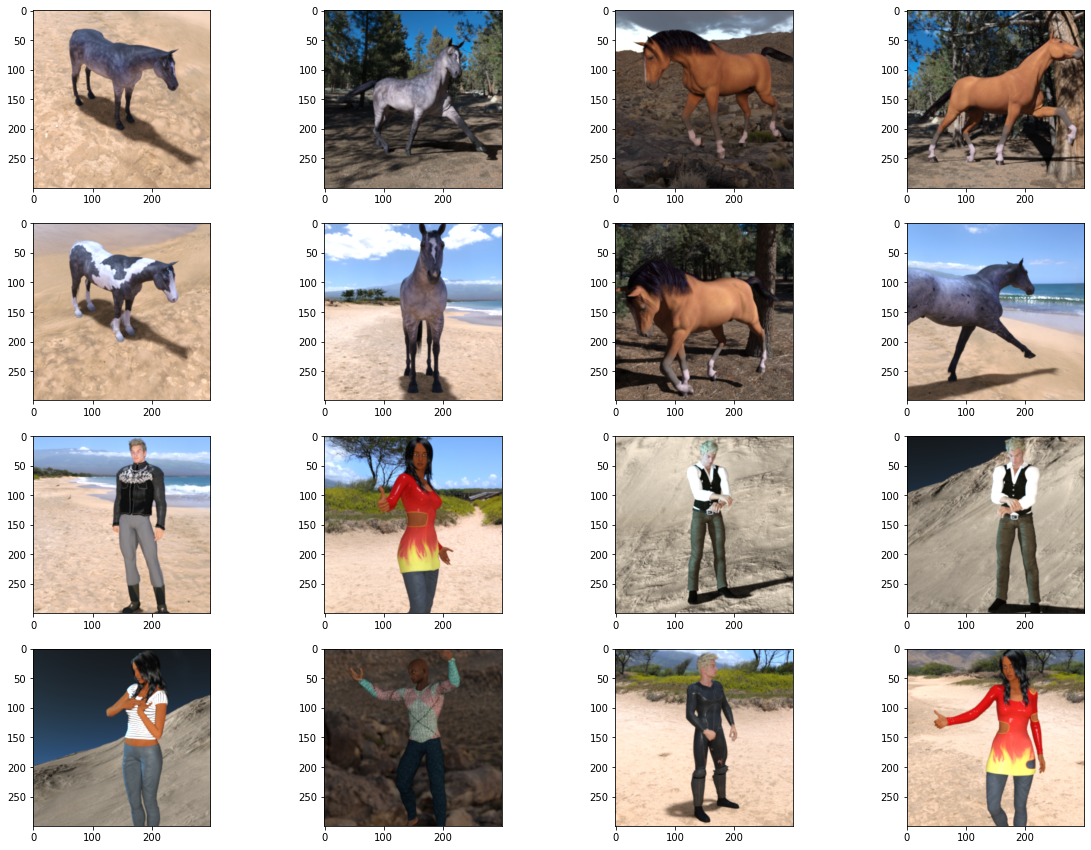

In [45]:
import matplotlib.pyplot as plt
#matplotlibでの画像の表示
import matplotlib.image as mpimg

flg=plt.gcf()

horse_pix=[os.path.join(train_horse_dir,i) for i in  train_horse_names[0:8]]
human_pix=[os.path.join(train_human_dir,j) for j in train_human_names[0:8]]

print('horse_pix:',horse_pix,'\nhuman_pix:',human_pix)

plt.figure(figsize=(20, 15))
for i ,img_path in enumerate(horse_pix+human_pix):
  plt
  sp=plt.subplot(4,4,i+1)
  img=mpimg.imread(img_path)

  plt.imshow(img)
plt.show()

In [47]:
import tensorflow as tf

#ニューラルネットワークの構築
model=tf.keras.models.Sequential([
  #RGB画像                                
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
  tf.keras.layers.MaxPooling2D(2,2),                                 
  
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
  
  ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 32)       

In [64]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"]
)

#train,testデータに切り分け
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    '/content/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Found 1027 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 74s 10s/step - loss: 1.0772 - accuracy: 0.5428
Epoch 2/15
8/8 [==============================] - 69s 8s/step - loss: 0.5591 - accuracy: 0.7964
Epoch 3/15
8/8 [==============================] - 69s 8s/step - loss: 0.8711 - accuracy: 0.6763
Epoch 4/15
8/8 [==============================] - 69s 8s/step - loss: 0.3185 - accuracy: 0.8810
Epoch 5/15
8/8 [==============================] - 69s 8s/step - loss: 0.2192 - accuracy: 0.9177
Epoch 6/15
8/8 [==============================] - 70s 9s/step - loss: 0.1144 - accuracy: 0.9566
Epoch 7/15
8/8 [==============================] - 69s 8s/step - loss: 0.3498 - accuracy: 0.8643
Epoch 8/15
8/8 [==============================] - 69s 8s/step - loss: 0.4079 - accuracy: 0.8610
Epoch 9/15
8/8 [==============================] - 74s 9s/step - loss: 0.1215 - accuracy: 0.9533
Epoch 10/15
8/8 [==============================] - 70s 8s/step - loss: 0.0887 - accuracy: 0.9

In [59]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
import os
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 101MB/s]


In [33]:
#train,validationデータが分かれている
train_horse_dir=os.path.join('/content/horse-or-human/horses')
train_human_dir=os.path.join('/content/horse-or-human/humans')
validation_horse_dir=os.path.join('/content/validation-horse-or-human/horses')
validation_human_dir=os.path.join('/content/validation-horse-or-human/humans')

train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)
validation_horse_names=os.listdir(validation_horse_dir)
validation_human_names=os.listdir(validation_human_dir)

print('train_horse_names:',len(train_horse_names),train_horse_names[:10])
print('train_human_names:',len(train_human_names),train_horse_names[:10])
print('validation_horse_names:',len(validation_horse_names),validation_horse_names[:10])
print('validation_human_names:',len(validation_human_names),validation_human_names[:10])

train_horse_names: 500 ['horse36-9.png', 'horse26-4.png', 'horse01-1.png', 'horse24-8.png', 'horse04-1.png', 'horse35-0.png', 'horse02-8.png', 'horse11-9.png', 'horse32-6.png', 'horse41-8.png']
train_human_names: 527 ['horse36-9.png', 'horse26-4.png', 'horse01-1.png', 'horse24-8.png', 'horse04-1.png', 'horse35-0.png', 'horse02-8.png', 'horse11-9.png', 'horse32-6.png', 'horse41-8.png']
validation_horse_names: 128 ['horse5-083.png', 'horse6-345.png', 'horse5-303.png', 'horse1-455.png', 'horse1-484.png', 'horse2-596.png', 'horse5-519.png', 'horse5-275.png', 'horse4-159.png', 'horse5-103.png']
validation_human_names: 128 ['valhuman01-03.png', 'valhuman04-04.png', 'valhuman01-20.png', 'valhuman01-10.png', 'valhuman02-00.png', 'valhuman04-10.png', 'valhuman03-22.png', 'valhuman04-00.png', 'valhuman02-09.png', 'valhuman03-09.png']


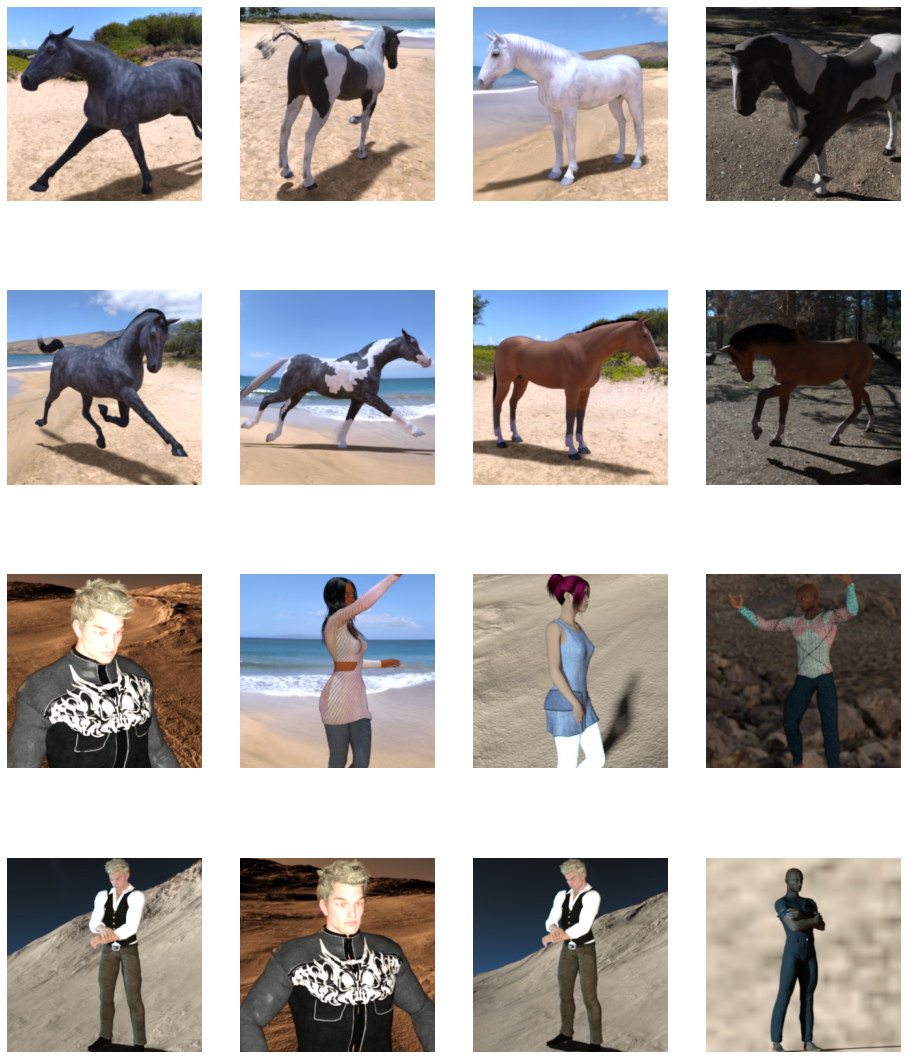

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
horse_pix=[os.path.join(train_horse_dir,i) for i in train_horse_names[0:8]]
human_pix=[os.path.join(train_human_dir,j) for j in train_human_names[0:8]]
plt.figure(figsize=(16,20))
for i,path in enumerate(horse_pix+human_pix):
  sp=plt.subplot(4,4,i+1)
  sp.axis('Off')
  img=mpimg.imread(path)
  plt.imshow(img)
plt.show()

In [72]:
model=tf.keras.models.Sequential([    
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
 
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

train=train.flow_from_directory(
    '/content/horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

validation=validation.flow_from_directory(
    '/content/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)
history=model.fit(
  train,
  steps_per_epoch=8,
  epochs=15,
  verbose=1,
  validation_data=validation,
  validation_steps=8
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 33, 33, 64)       

In [87]:
history.history

{'accuracy': [0.5022026300430298,
  0.69921875,
  0.74609375,
  0.91015625,
  0.850220263004303,
  0.875,
  0.9118942618370056,
  0.9609375,
  0.9921875,
  0.7885462641716003,
  0.921875,
  0.9765625,
  0.984375,
  0.9609375,
  0.9735682606697083],
 'loss': [1.3152793645858765,
  0.6512833833694458,
  0.5502317547798157,
  0.26717594265937805,
  0.7208428978919983,
  0.5096666216850281,
  0.20101726055145264,
  0.12288019061088562,
  0.038697823882102966,
  1.509314775466919,
  0.2219008207321167,
  0.07271886616945267,
  0.052541546523571014,
  0.09631762653589249,
  0.08177585154771805],
 'val_accuracy': [0.50390625,
  0.8515625,
  0.82421875,
  0.83984375,
  0.8828125,
  0.83984375,
  0.84375,
  0.84765625,
  0.58984375,
  0.8359375,
  0.8046875,
  0.8515625,
  0.8828125,
  0.82421875,
  0.86328125],
 'val_loss': [0.6605912446975708,
  0.3899218440055847,
  0.4083111584186554,
  0.567913293838501,
  0.4117612838745117,
  0.7487978339195251,
  1.0850622653961182,
  0.9179438948631287

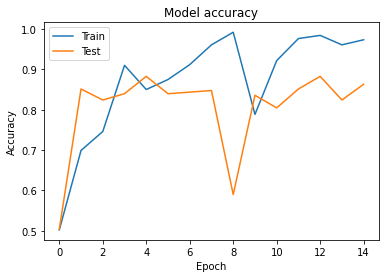

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

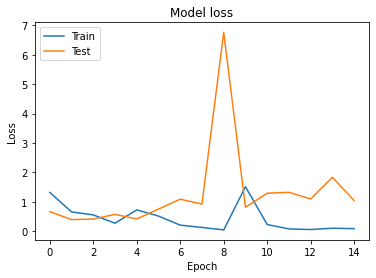

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()